# Statistical Analysis
We want to know how the data looks like. How similar are the single sequences to each other, how does a PCA of it looks like?
This may serve as explanation of why the training and testing error are always the same.

In [10]:
%matplotlib inline

# some always important inputs
import sys
import os
import random
import time
import numpy as np
import cPickle

# the underlying convRBM implementation
sys.path.append(os.path.abspath('../code'))
from convRBM import CRBM
import getData as dataRead

# plotting and data handling
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.decomposition import PCA

# the biopython stuff
import Bio.SeqIO as sio
import Bio.motifs.matrix as mat
from Bio.Alphabet import IUPAC
from Bio.Seq import Seq
from Bio import motifs as mot

In [3]:
seqReader = dataRead.FASTAReader()
start = time.time()
allSeqs = seqReader.readSequencesAsOneHotMatrices('../data/wgEncodeAwgDnaseUwAg10803UniPk.fa')
print "Reading the data took (in ms): " + str((time.time()-start)*1000)


ERROR. LETTER N DOES NOT EXIST!
ERROR. LETTER N DOES NOT EXIST!
Reading the data took (in ms): 28450.4549503


In [8]:
sampleNum = len(allSeqs)
print sampleNum
Data = np.zeros((sampleNum, 150))
for i in range(sampleNum):
    Data[i,:] = np.argmax(allSeqs[i], axis=1).sum(axis=0)


(1, 4, 150)
(1, 150)
[[3 1 0 3 0 2 1 1 0 3 1 0 3 1 0 1 1 1 3 1 1 3 3 0 0 1 1 3 1 3 0 1 3 3 1 3 0
  1 1 3 2 1 2 1 1 3 0 0 3 1 3 0 1 3 1 1 0 1 1 3 1 0 0 3 1 0 1 0 1 3 0 1 3 1
  1 1 3 0 3 0 3 1 3 0 0 1 0 0 1 2 3 0 0 0 0 0 3 0 0 0 0 3 2 0 1 0 2 3 3 3 2
  0 0 1 0 1 0 1 0 0 0 0 1 1 1 0 1 1 1 1 0 3 3 1 1 3 1 1 1 1 0 1 0 1 3 1 0 3
  1 2]]
171275


# PCA

In [12]:
print Data.shape
pca = PCA(n_components=2)
DataProjected = pca.fit_transform(Data)
print DataProjected.shape

(171275, 150)
(171275, 2)


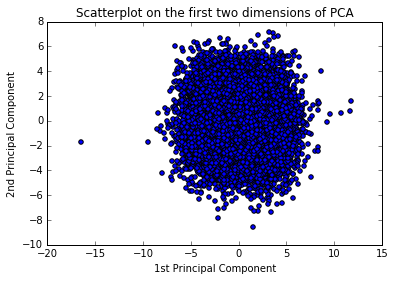

In [24]:
plt.xlabel('1st Principal Component')
plt.ylabel('2nd Principal Component')
plt.title('Scatterplot on the first two dimensions of PCA')
plt.scatter(DataProjected[:,0], DataProjected[:,1])
plt.savefig('scatter.png')

# Analyzing the variance along the sequence

In [28]:
var = np.var(Data, axis=0)
print var.shape

(150,)


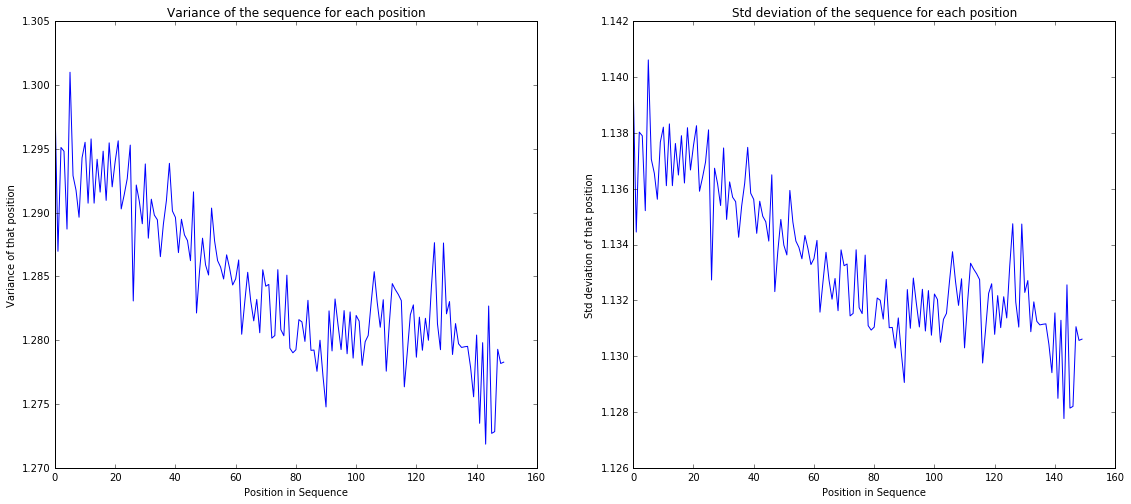

In [37]:
plt.figure(figsize=(19,8))
plt.subplot(1,2,1)
plt.xlabel('Position in Sequence')
plt.ylabel('Variance of that position')
plt.title('Variance of the sequence for each position')
plt.plot(var)

plt.subplot(1,2,2)
plt.xlabel('Position in Sequence')
plt.ylabel('Std deviation of that position')
plt.title('Std deviation of the sequence for each position')
plt.plot(np.std(Data, axis=0))
plt.show()